In [1]:
%autosave 1

Autosaving every 1 seconds


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
completeSpamAssassin=pd.read_csv("completeSpamAssassin.csv")
enronSpamSubset=pd.read_csv("enronSpamSubset.csv")
lingSpam=pd.read_csv("lingSpam.csv")
completeSpamAssassin=completeSpamAssassin.drop("Unnamed: 0", axis=1)
#enronSpamSubset=enronSpamSubset.drop("Unnamed: 0", axis=1)
#enronSpamSubset=enronSpamSubset.drop("Unnamed: 0.1", axis=1)
#lingSpam=lingSpam.drop("Unnamed: 0", axis=1)
#dataset=pd.concat([completeSpamAssassin,enronSpamSubset,lingSpam], ignore_index =True)
dataset=completeSpamAssassin
dataset.Body=dataset.Body.str.replace('[^A-Za-z\s]+', '')
dataset.Body=dataset.Body.str.replace('\n', ' ')
dataset=dataset.dropna()
np_dataset=np.array(dataset)
#np_dataset[0,1]

C:\Users\anirb\AppData\Local\Temp\ipykernel_5792\1417811256.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset.Body=dataset.Body.str.replace('[^A-Za-z\s]+', '')


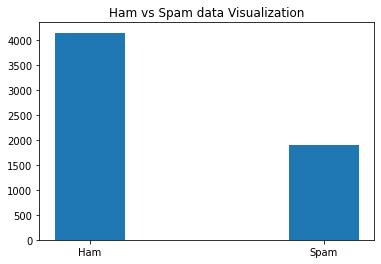

In [10]:
x_axis=['Ham','Spam']
y_axis=[np.sum(np_dataset[:,1]==0),np.sum(np_dataset[:,1]==1)]
plt.bar(x_axis,y_axis,width=.3)
plt.title("Ham vs Spam data Visualization")
plt.show()
ham=np_dataset[np_dataset[:,1]==0][:,0]
spam=np_dataset[np_dataset[:,1]==1][:,0]

In [27]:
class Word_handling:
    def __init__(self):
        pass
    def split_sentence_in_words(self, sentence):
        #print(type(sentence))
        return sentence.lower().split()
    def split_words(self, sentence_list):
        words=[]
        #print("here")
        for sentence in sentence_list:
            for word in self.split_sentence_in_words(sentence):
                words.append(word)
        return np.array(words)
    def split_sentences_in_words(self, sentence_list):
        word_list=[]
        for sentence in sentence_list:
            word_list.append(self.split_sentence_in_words(sentence))
        return np.array(word_list)
    def get_unique_words(self, sentence_list):
        unique_words=[]
        sentence_word_list=self.split_words(sentence_list)
        unique_words.append(np.unique(sentence_word_list))
        return unique_words

In [32]:
whnd=Word_handling()
ham_unique_words=whnd.get_unique_words(ham)
spam_unique_words=whnd.get_unique_words(spam)
for words in ham_unique_words[:]:
    ham_string=" ".join(words)
for words in spam_unique_words[:]:
    spam_string=" ".join(words)

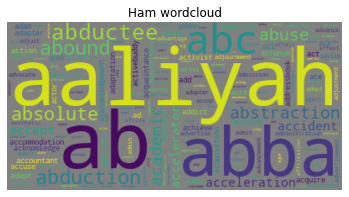

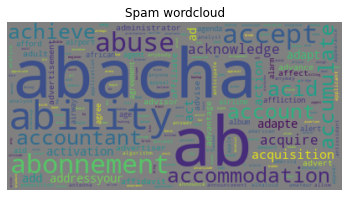

In [45]:
wordcloud_ham=WordCloud(background_color='grey',).generate(ham_string)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Ham wordcloud')
plt.show()
wordcloud_spam=WordCloud(background_color='grey').generate(spam_string)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Spam wordcloud')
plt.show()